In [12]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
X, y = make_blobs(n_samples=10000, centers=4, n_features=10, random_state=42)
X_df = pd.DataFrame(X)
X_df

,0,1,2,3,4,5,6,7,8,9
0,-2.016080,9.970147,3.830118,1.167768,-6.859355,-8.412331,-9.108068,7.576400,3.806936,4.564170
1,-9.275147,9.741425,7.462053,-7.387764,-7.939898,-5.660199,-3.558793,-0.280515,-0.996791,-5.583377
2,-9.200832,8.845106,6.990260,-6.469639,-5.458776,-5.084816,-3.866148,1.837605,-1.201026,-3.260904
3,2.648156,-8.111283,-4.264091,-1.585194,-0.320490,5.214999,-5.168032,-1.383241,2.045398,-9.454989
4,-3.601510,8.697878,5.852977,2.114887,-4.560298,-6.486792,-8.646279,7.014406,2.155841,4.008982
...,...,...,...,...,...,...,...,...,...,...
9995,-10.475248,8.902398,5.177354,-6.594873,-6.576344,-6.699047,-1.860588,-0.820228,-1.406194,-6.238877
9996,3.748248,-7.795707,-7.985860,7.580860,10.080588,5.484171,-3.997070,-7.343344,3.770557,-0.954738
9997,-4.211100,8.452948,4.310390,3.648029,-7.154429,-9.081353,-10.837217,7.357553,2.636071,4.536907
9998,-9.998427,10.309841,6.730022,-5.679900,-8.852194,-5.511958,-4.085689,1.250061,0.283862,-3.352051


In [10]:
pca = PCA(n_components=2)
pca.fit_transform(X_df)
X_reduced = pca.transform(X_df)
X_reduced = pd.DataFrame(X_reduced)

In [11]:
X_reduced['cluster'] = y
X_reduced

,0,1,cluster
0,14.735970,8.064162,0
1,16.103378,-6.779234,1
2,14.893325,-4.456412,1
3,-10.934156,-8.511636,2
4,13.313724,7.556437,0
...,...,...,...
9995,14.449771,-6.648440,1
9996,-20.075825,5.377177,3
9997,14.688445,9.030962,0
9998,16.807635,-4.129705,1


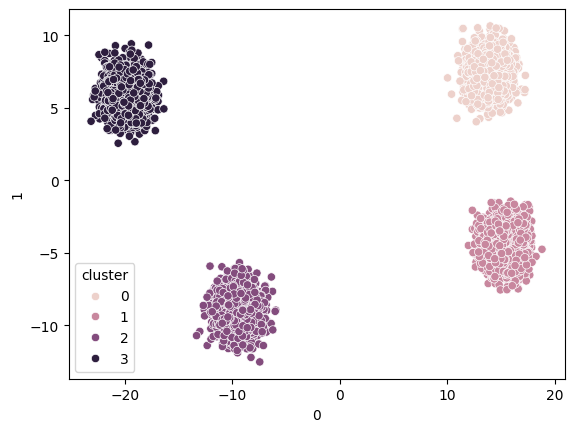

In [17]:
sns.scatterplot(x=0, y=1, hue='cluster', data=X_reduced)
plt.show()

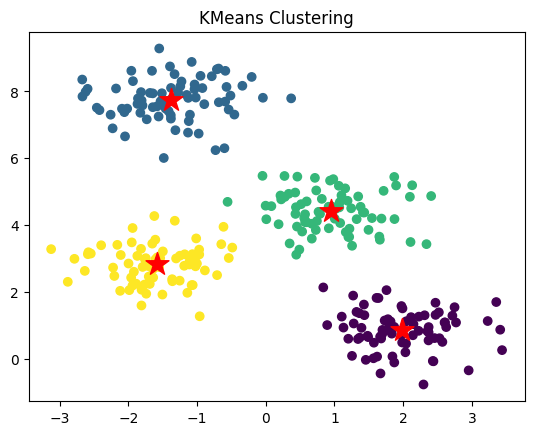

In [205]:
import numpy as np

def kmeans_plusplus_init(X, k):
    """ K-means++ initialization to choose initial centroids """
    n_samples, _ = X.shape
    centroids = np.zeros((k, X.shape[1]))
    # Randomly choose the first centroid from the data points
    centroids[0] = X[np.random.randint(n_samples)]
    for i in range(1, k):
        distances = np.min(np.linalg.norm(X[:, np.newaxis] - centroids[:i], axis=2), axis=1)
        probabilities = distances / distances.sum()
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        for j, p in enumerate(cumulative_probabilities):
            if r < p:
                centroids[i] = X[j]
                break
    return centroids

class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, init='kmeans++'):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.init = init
        self.centroids = None
        self.labels = None

    def fit(self, X):
        if self.init == 'kmeans++':
            self.centroids = kmeans_plusplus_init(X, self.n_clusters)
        else:
            # Random initialization
            random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
            self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            # Compute distances and assign clusters
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            # Compute new centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) if np.any(self.labels == i) else self.centroids[i]
                                      for i in range(self.n_clusters)])

            # Check for convergence
            if np.linalg.norm(self.centroids - new_centroids, ord='fro') < self.tol:
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

    kmeans = KMeans(n_clusters=4, max_iter=300, tol=1e-4, init='kmeans++')
    kmeans.fit(X)

    import matplotlib.pyplot as plt
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels)
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, marker='*', c='red')  # mark centroids
    plt.title('KMeans Clustering')
    plt.show()


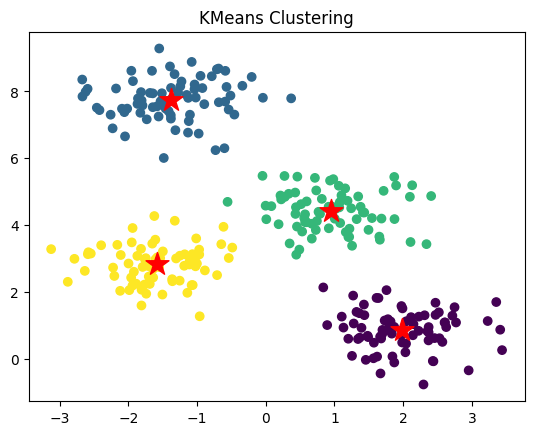

In [214]:
class KMeans:
    def __init__(self, n_clusters=4, max_iter=300, tol=1e-5, init='kmeans++'):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.init = init
        self.centroids  = None
        self.labels = None
        
    def fit(self, X):
        if self.init == "kmeans++":
            self.centroids = self.kmeans_plusplus_init(X, self.n_clusters)
        
        else:
            self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            # Compute distances and assign clusters
            ds = np.linalg.norm(X[:,np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(ds, axis=1)
            
            # new centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) if np.any(self.labels == i) else self.centroids[i] for i in range(self.n_clusters)])
            
            # Check if we need to stop
            if np.linalg.norm(self.centroids - new_centroids, ord='fro') < self.tol:
                break
            
            self.centroids = new_centroids
            
        
    def predict(self, X):
        ds = ds = np.linalg.norm(X[:,np.newaxis] - self.centroids, axis=2)
        return np.argmin(ds, axis=1)
            
            
    def kmeans_plusplus_init(self, X, k):
        """ K-means++ initialization to choose initial centroids """
        n_samples, _ = X.shape
        centroids = np.zeros((k, X.shape[1]))
        # Randomly choose the first centroid from the data points
        centroids[0] = X[np.random.randint(n_samples)]
        for i in range(1, k):
            distances = np.min(np.linalg.norm(X[:, np.newaxis] - centroids[:i], axis=2), axis=1)
            probabilities = distances / distances.sum()
            cumulative_probabilities = np.cumsum(probabilities)
            r = np.random.rand()
            for j, p in enumerate(cumulative_probabilities):
                if r < p:
                    centroids[i] = X[j]
                    break
        return centroids
    
    
    
    
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

    kmeans = KMeans(n_clusters=4, max_iter=300, tol=1e-4, init='kmeans++')
    kmeans.fit(X)

    import matplotlib.pyplot as plt
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels)
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, marker='*', c='red')  # mark centroids
    plt.title('KMeans Clustering')
    plt.show()


In [186]:
A = np.array([[1, 2, 3], [2, 1, 2], [3, 1, 2]])
C = np.array([[1, 3, 1], [2, 3, 1]])

res = A[:,np.newaxis] - C

np.linalg.norm(res, axis=2)

array([[2.23606798, 2.44948974],
       [2.44948974, 2.23606798],
       [3.        , 2.44948974]])

<Axes: xlabel='0', ylabel='1'>

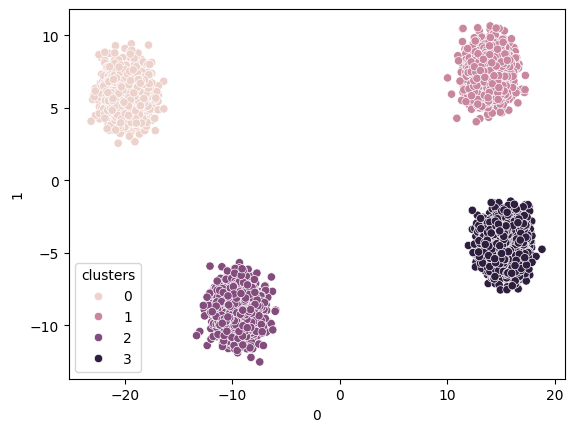

In [181]:
sns.scatterplot(X_reduced, x=0, y=1, hue='clusters')

In [168]:
np.linalg.norm(np.array([1, 2, 3]) - np.array([[2, 3, 4], [3, 4, 5]]), axis=1)

array([1.73205081, 3.46410162])